<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-WEEK-11/blob/main/Part_2_of_Week_11_Independent_project_Regression_Victoria_Mbaka_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDEPENDENT PROJECT 11: PREDICTION WITH REGRESSION** (continuation)

---



---



1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

***Input***: Home team, Away team, Tournament type (World cup, Friendly, Other)

***`Approach 1`***: Polynomial approach

What to train given:

*   Rank of home team
*   Rank of away team
*   Tournament scores.


Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

### b) Defining the Metric for Success


*   Being able to predict the goals for home team scores and the away team scores.



### c) Understanding the context

*   This is a problem that requires prediction(prediction problems are worked out using regression.)





### e) Data Relevance
The data provided is upto date and relevant for the analysis to be done.
the dataset can be found here: [Dataset](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)

### d) Recording the Experimental Design

 The flow of this prediction analysis is as follows:

1.   Define the question
2.   Define the metric for success
3.   Understansing the context
4.   Documenting the experimental design taken and the appropriateness of the available data to answer the given question.

Expected flow for the assessment:

1.   Perform EDA
2.   Perform any necessary feature engineering 
3.   Check of multicollinearity
4.   Start building the model
5.   Cross-validate the model
6.   Compute RMSE
7.   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8.   Perform appropriate regressions on the data including your justification
9.   Challenge your solution by providing insights on how you can make improvements. 



## 2. Reading the Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# Loading the Datasets
url = '/content/fifa_ranking.csv'
ranking = pd.read_csv(url)
url1 = '/content/results.csv'
results = pd.read_csv(url1)

## 3. Checking the Data

In [8]:
# Determining the no. of records in our dataset
#
print('ranking = ',ranking.shape)
print('results = ',results.shape)

ranking =  (57793, 16)
results =  (40839, 9)


In [9]:
# Previewing the top of our datasets
print('results')
print('*'*100)
print(results.head())
print('*'*100)
print('ranking')
print('*'*100)
print(ranking.head())

results
****************************************************************************************************
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
****************************************************************************************************
ranking
****************************************************************************************************
   rank country_full country_abrv  total_points  previou

In [10]:
# Previewing the bottom of our dataset
# 
print('results')
print('*'*100)
print(results.tail())
print('*'*100)
print('ranking')
print('*'*100)
print(ranking.tail())

results
****************************************************************************************************
             date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True  
**************************************************

In [11]:
# Checking whether each column has an appropriate datatype
#
print('ranking :',ranking.dtypes)
print('*'*100)
print('results :',results.dtypes)

ranking : rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
****************************************************************************************************
results : date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 5. Tidying the Dataset

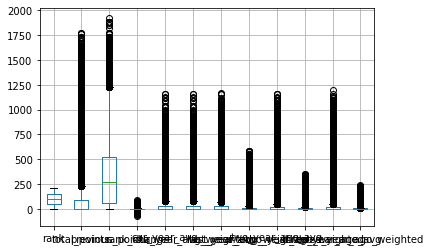

In [12]:
# Checking for Outliers
#
ranking.boxplot();

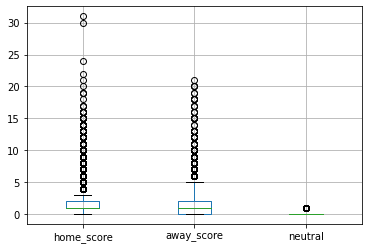

In [13]:
results.boxplot();

In [14]:
# There seems to be a number of outliers, but for this analysis, they will not be dropped since they are valid observations
# and their removal might distort the correct prediction.

In [15]:
# Checking for Anomalies
#
print('ranking:',ranking.duplicated().sum())
print('results:',results.duplicated().sum())

ranking: 37
results: 0


In [16]:
ranking = ranking.drop_duplicates()


In [17]:
# Identifying the Missing Data
#
print('ranking:',ranking.isnull().sum())
print('*'*100)
print('results:',results.isnull().sum())

ranking: rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
****************************************************************************************************
results: date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [18]:
# Dealing with the Missing Data
# There is no missing data.

In [19]:
# More data cleaning procedures
# droppig unnecessary columns
to_drop = ['country_abrv', 'rank_date']
ranking.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
ranking.columns = ['rank', 'country', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation']
ranking.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [21]:
# merging datasets
data = ranking.merge(results, how = 'left',on = 'country')
data.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,False
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,False
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,False
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart,False
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1911-10-09,Germany,Austria,1.0,2.0,Friendly,Dresden,False


In [22]:
data = data.drop(columns=['date', 'city', 'neutral'])


In [23]:
data.isnull().sum()

rank                          0
country                       0
total_points                  0
previous_points               0
rank_change                   0
cur_year_avg                  0
cur_year_avg_weighted         0
last_year_avg                 0
last_year_avg_weighted        0
two_year_ago_avg              0
two_year_ago_weighted         0
three_year_ago_avg            0
three_year_ago_weighted       0
confederation                 0
home_team                  4774
away_team                  4774
home_score                 4774
away_score                 4774
tournament                 4774
dtype: int64

In [24]:
data = data.dropna()

In [25]:
data.duplicated().sum()

1245720

In [26]:
data = data.drop_duplicates()

In [27]:
data.shape

(8994981, 19)

In [28]:
# Focusing on independent features only

# Removing the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = data.drop(columns=['rank', 'rank_change','cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,total_points,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
total_points,1.000000,0.535525,0.977089,0.940651,0.931054,0.923187,0.030221,-0.021424
previous_points,0.535525,1.000000,0.526597,0.504219,0.492587,0.485273,0.062654,-0.050009
cur_year_avg,0.977089,0.526597,1.000000,0.863268,0.875792,0.864727,0.028844,-0.019688
last_year_avg,0.940651,0.504219,0.863268,1.000000,0.861840,0.880630,0.028715,-0.020902
two_year_ago_avg,0.931054,0.492587,0.875792,0.861840,1.000000,0.866882,0.028968,-0.021074
three_year_ago_avg,0.923187,0.485273,0.864727,0.880630,0.866882,1.000000,0.029402,-0.022499
home_score,0.030221,0.062654,0.028844,0.028715,0.028968,0.029402,1.000000,-0.136154
away_score,-0.021424,-0.050009,-0.019688,-0.020902,-0.021074,-0.022499,-0.136154,1.000000


In [36]:
revised = independent_only.drop(columns=['total_points'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
previous_points,1.410107,-0.461998,-0.238277,-0.077969,-0.004564,-0.059443,0.046602
cur_year_avg,-0.461998,5.907522,-1.528790,-2.260376,-1.579222,0.011595,-0.020339
last_year_avg,-0.238277,-1.528790,5.879736,-1.483946,-2.454096,0.004652,-0.004971
two_year_ago_avg,-0.077969,-2.260376,-1.483946,5.781952,-1.712825,-0.003980,0.003350
three_year_ago_avg,-0.004564,-1.579222,-2.454096,-1.712825,6.014384,-0.008816,0.015407
home_score,-0.059443,0.011595,0.004652,-0.003980,-0.008816,1.022181,0.136245
away_score,0.046602,-0.020339,-0.004971,0.003350,0.015407,0.136245,1.020794


## Cross Validation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data[['home_score', 'away_score', 'tournament']].values
y = data['rank'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['tournament'] = label_encoder.fit_transform(data['tournament'])
data['confederation']= label_encoder.fit_transform(data['confederation'])
 
# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE is 49, which is not less than 10% of the mean, therefore may not be a very trustworthy model. 

Mean Absolute Error: 41.3568742443558
Mean Squared Error: 2441.5661934376776
Root Mean Squared Error: 49.412206927414985


In [32]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = data[['home_score', 'away_score', 'tournament']].values
y = data['rank'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 45.79432791517895

Training model 2
Model 2 Root Mean Squared Error: 47.78550273264696

Training model 3
Model 3 Root Mean Squared Error: 49.73085630657228

Training model 4
Model 4 Root Mean Squared Error: 50.4378975891208

Training model 5
Model 5 Root Mean Squared Error: 53.28884826266237


In [33]:
np.mean(RMSES)
# The average root mean squared error is 49.4074, which is not very different from the value obtained from the initial approach.

49.40748656123627

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 

# Using of different number of folds as a way of challenging the solution above.

from sklearn.model_selection import LeaveOneOut

X = data[['home_score', 'away_score', 'tournament']].values
y = data['rank'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 8994981 folds


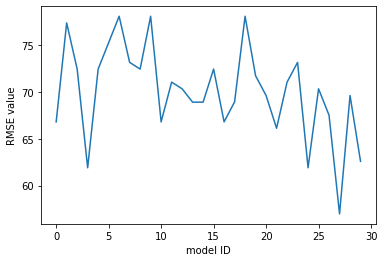

In [52]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

## Residual plots and heteroskedasticity testing

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [38]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = data['rank'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

revised['country']= label_encoder.fit_transform(revised['country'])
regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

ValueError: ignored

In [54]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

NameError: ignored

## Regressions

In [ ]:
# Logistic regression

In [39]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

ValueError: ignored

In [40]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

NotFittedError: ignored

### Barlett's test

In [41]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

NameError: ignored

In [42]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 137 and 69 are the number of correct predictions. 
# 34 and 27 are the number of incorrect predictions.

ValueError: ignored

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
*   Yes because our question was answered



### b). Do we need other data to answer our question?
*   No


### c). Did we have the right question?
*   Yes. It was suitable for our data
